# Exponential Families

Many familiar distributions like the ones we covered in lecture 1 are _exponential family distributions_. As Brad Efron likes to say, exponential family distributions bridge the gap between the Gaussian family and general distributions. For Gaussian distributions, we have exact small-sample distributional results ($t$, $F$, and $\chi^2$ tests); in the exponential family setting we have approximate distributional results (deviance tests); in the general setting, we have to appeal to asymptotics. 


In [42]:
import torch
import matplotlib.pyplot as plt

from torch.distributions import Poisson, Normal
from torch.distributions.kl import kl_divergence

## Definition
    
Exponential family distributions have densities of the form,
\begin{align*}
    p(y \mid \eta) &= h(y) \exp \left \{\langle t(y), \eta \rangle - A(\eta) \right\},
\end{align*}
where 
- $h(y): \cY \to \reals_+$ is the **base measure**,
- $t(y) \in \reals^T$ are the **sufficient statistics**,
- $\eta \in \reals^T$ are the **natural parameters**, and
- $A(\eta): \reals^T \to \reals$ is the **log normalizing** function (aka the **partition function**).

The log normalizer ensures that the density is properly normalized,
\begin{align*}
    A(\eta) &= \log \int h(y) \exp \left \{\langle t(y), \eta \rangle \right\} \dif y
\end{align*}

The domain of the exponential family is the set of valid natural parameters, $\Omega = \{\eta: A(\eta) < \infty\}$. An exponential family is a family of distributions defined by base measure $h$ and sufficient statistics $t$, and it is indexed by natural paremeters $\eta \in \Omega$.

## Examples 


### Gaussian with known variance

Consider the scalar Gaussian distribution,
\begin{align*}
\mathrm{N}(y; \mu, \sigma^2) 
&= \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2} ( y- \mu)^2} \\
&= \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2} ( y^2 - 2 y \mu + \mu^2)}
\end{align*}
We can write this as an exponential family distribution where,
where
- the base measure is $h(y) = \frac{e^{-\frac{y^2}{2 \sigma^2}}}{\sqrt{2 \pi \sigma^2}}$
- the sufficient statistics are $t(y) = \frac{y}{\sigma}$
- the natural parameter is $\eta = \frac{\mu}{\sigma}$
- the log normalizer is $A(\eta) = \frac{\eta^2}{2}$
- the domain is $\Omega = \reals$


### Poisson distribution
Likewise, take the Poisson pmf,
\begin{align*}
    \mathrm{Po}(y; \lambda) 
    &= \frac{1}{y!} \lambda^{y} e^{-\lambda} \\
    &= \frac{1}{y!} \exp \left\{ y \log \lambda - \lambda \right \} \\
    &= h(y) \exp \left\{ y \eta - A(\eta) \right \} 
\end{align*}
where
- the base measure is $h(y) = \frac{1}{y!}$
- the sufficient statistics are $t(y) = y$
- the natural parameter is $\eta = \log \lambda$
- the log normalizer $A(\eta) = \lambda = e^\eta$
- the domain is $\Omega = \reals$



### Bernoulli distribution

:::{admonition} Exercise
Write the Bernoulli distribution in exponential family form. Recall that its pmf is 
\begin{align*}
    \mathrm{Bern}(y; p) &= p^{y} \, (1-p)^{1 - y} 
\end{align*}
What are the base measure, the sufficient statistics, the natural parameter, the log normalizer, and the domain?
:::

<!-- ### Bernoulli distribution
The Bernoulli distribution can be written in exponential family form,
\begin{align*}
    \mathrm{Bern}(y; p) &= p^{y} \, (1-p)^{1 - y} \\
    &= \exp \left\{ y \log p + (1-y) \log (1- p) \right \} \\
    &= \exp \left\{ y \log \frac{p}{1 - p} + \log (1 - p) \right \}  \\
    &= h(y) \exp \left\{ y \eta - A(\eta) \right \} 
\end{align*}
where
- the base measure is $h(y) = 1$
- the sufficient statistics are $t(y) = y$
- the natural parameter is $\eta = \log \frac{p}{1- p}$
- the log normalizer is
    \begin{align*}
    A(\eta) &= -\log ( 1 - p) \\
    &= - \log \left(1 - \frac{e^{\eta}}{1 + e^{\eta}} \right) \\
    &= - \log \frac{1}{1 + e^{\eta}}  \\
    &= \log \left(1 + e^{\eta} \right).
    \end{align*}
- the domain is $\Omega = \reals$ -->

### Categorical distribution
Finally, take the categorical pmf for $Y \in \{1, \ldots, K\}$,
\begin{align*}
    \mathrm{Cat}(y; \mbpi) 
    &= \prod_{k=1}^K \pi_k^{\bbI[y = k]} \\
    &= \exp \left\{ \sum_{k=1}^K \bbI[y=k], \log \pi_k \right \} \\
    &= \exp \left\{ \langle \mbe_y, \log \mbpi \rangle \right \} \\
    &= h(y) \exp \left\{ \langle t(y), \mbeta \rangle - A(\mbeta) \right \} 
\end{align*}
where
- the base measure is $h(y) = \bbI[y \in \{1,\ldots,K\}]$
- the sufficient statistics are $t(y) = \mbe_y$, the one-hot vector representation of $y$
- the natural parameter is $\mbeta = \log \mbpi = (\log \pi_1, \ldots, \log \pi_K)^\top \in \reals^K$
- the log normalizer $A(\mbeta) = 0$
- the domain is $\Omega = \reals^K$


## The Log Normalizer

The **cumulant generating function** &mdash; i.e., the log of the moment generative function &mdash; is a difference of log normalizers,
\begin{align*}
\log \E_\eta[e^{\langle t(Y), \theta \rangle}] 
&= \log \int h(y) \exp \left\{ \langle t(y), \eta + \theta \rangle - A(\eta) \right\} \dif y \\
&= \log e^{A(\eta + \theta) - A(\eta)} \\
&= A(\eta + \theta) - A(\eta) \\
&\triangleq K_\eta(\theta)
\end{align*}
Its derivatives (with respect to $\theta$ and evaluated at zero) yield the cumulants. In particular, 
- $\nabla_\theta K_\eta(0) = \nabla A(\eta)$ yields the first cumulant of $t(Y)$, its mean
- $\nabla^2_\theta K_\eta(0) = \nabla^2 A(\eta)$ yields the second cumulant, its covariance

Higher order cumulants can be used to compute skewness, kurtosis, etc.

### Gradient of the log normalizer

We can also obtain this result more directly. 
\begin{align*}
    \nabla A(\eta) 
    &= \nabla \log \int h(y) \exp \left \{\langle t(y), \eta \rangle \right\} \dif y \\
    &= \frac{\int h(y) \exp \left \{\langle t(y), \eta \rangle \right\} t(y) \dif y}{\int h(y) \exp \left \{\langle t(y), \eta \rangle \right\} \dif y} \\
    &= \int p(y \mid \eta) \, t(y) \dif y \\
    &= \E_\eta[t(Y)]
\end{align*}
Again, the gradient of the log normalizer yields the **expected sufficient statistics**,


### Hessian of the log normalizer 
    
The Hessian of the log normalizer yields the **covariance of the sufficient statistics**,
\begin{align*}
    \nabla^2 A(\eta) 
    &= \nabla \int p(y \mid \eta) \, t(y) \dif y \\
    &= \int p(y \mid \eta) \, t(y) \, (t(y) - \nabla A(\eta))^\top \dif y \\
    &= \E[t(Y) t(Y)^\top ] - \E[t(Y)] \, \E[t(Y)]^\top \\
    &= \mathrm{Cov}[t(Y)]
\end{align*}

## Maximum Likelihood Estimation

Suppose we have $y_i \iid\sim p(y; \eta)$ for a minimal exponential family distribution with natural parameter $\eta$. The log likelihood is,
\begin{align*}
\cL(\eta)
&= \sum_{i=1}^n \log p(y_i; \eta) \\
&= \left \langle \sum_{i=1}^n t(y_i), \eta \right \rangle - n A(\eta) + c
\end{align*}
The gradient is
\begin{align*}
\nabla \cL(\eta)
&= \sum_{i=1}^n t(y_i) - n \nabla A(\eta),
\end{align*}
and the Hessian is $\nabla^2 \cL(\eta) = -n \nabla^2 A(\eta)$. 

Since the log normalizer is convex, all local optima are global. If the log normalizer is _strictly_ convex, the MLE will be unique. 

Setting the gradient to zero and solving yields the stationary conditions for the MLE,
\begin{align*}
\nabla A[\hat{\eta}_{\mathsf{MLE}}] &= \bbE[t(Y); \hat{\eta}_{\mathsf{MLE}}] 
= \frac{1}{n} \sum_{i=1}^n t(y_i).
\end{align*}
When $\nabla A$ is invertible, the MLE is unique,
\begin{align*}
\hat{\eta}_{\mathsf{MLE}} = [\nabla A]^{-1} \left( \frac{1}{n} \sum_{i=1}^n t(y_i) \right).
\end{align*}
Even if $\nabla A$ is not invertible, maximum likelihood estimation amounts to matching empirical means of the sufficient statistics to corresponding natural parameters.

### Asymptotic normality

Recall that the MLE is asymptotically normal with variance given by the inverse Fisher information,
\begin{align*}
\cI(\eta) &= - \E[\nabla^2 \log p(y_i; \eta)] = \nabla^2 A(\eta) = \Cov_\eta[t(Y)].
\end{align*}
Thus, the asymptotic covariance of $\hat{\eta}_{\mathsf{MLE}}$ is $\cI(\eta)^{-1} = \tfrac{1}{n} \Cov_\eta[t(Y)]^{-1}$.

### Example: MLE for the Poisson distribution

Suppose $Y_i \iid{\sim} \mathrm{Po}(\lambda)$ for $i=1,\ldots,n$. The natural parameter of the Poisson distribution is $\eta = \log \lambda$, and the maximum likelihood estimate is $\hat{\eta}_{\mathsf{MLE}} = \log \left(\frac{1}{n} \sum_{i=1}^n y_i \right)$. The Fisher information matrix is the variance, $\cI(\eta) = \mathrm{Var}_\eta[Y] = e^\eta$. 

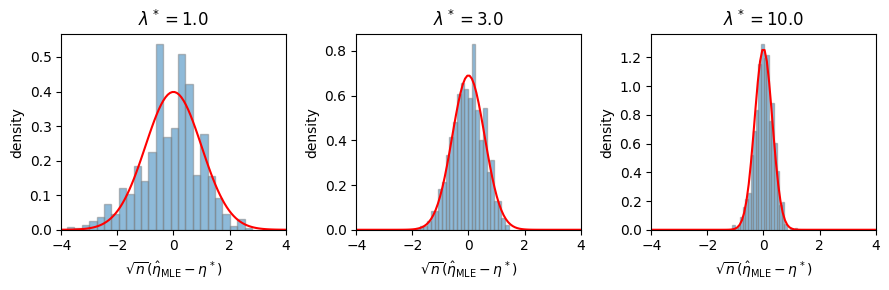

In [41]:
# Simulate a Poisson and look at the distribution of the MLE
def sample_and_compute_mle(seed, n, lmbda_true):
    torch.manual_seed(seed)
    ys = Poisson(lmbda_true).sample((n,))
    eta_mle = torch.log(ys.mean())
    return eta_mle

# Compute the MLE for a range of true rates
lmbda_trues = torch.tensor([1.0, 3.0, 10.0])
fig, axs = plt.subplots(1, len(lmbda_trues), figsize=(3 * len(lmbda_trues), 3))
n = torch.as_tensor(30)
for ax, lmbda_true in zip(axs, lmbda_trues):
    eta_true = torch.log(lmbda_true)
    fisher_info = Poisson(lmbda_true).variance

    mles = torch.tensor([sample_and_compute_mle(seed, n, lmbda_true) for seed in range(1000)])

    # Plot a histogram of the MLEs alongside the asymptotic normal distribution
    etas = torch.linspace(-4, 4, 100)
    ax.hist(torch.sqrt(n) * (mles - eta_true), density=True, bins=25, alpha=0.5, edgecolor='gray')
    ax.plot(etas, Normal(0, torch.sqrt(1 / fisher_info)).log_prob(etas).exp(), color='red')
    ax.set_xlim(-4, 4)
    ax.set_xlabel(r"$\sqrt{n}(\hat{\eta}_{\mathsf{MLE}} - \eta^*)$")
    ax.set_ylabel(r"density")
    ax.set_title(rf"$\lambda^* = {lmbda_true}$")

plt.tight_layout()

## Minimal Exponential Families

The Hessian of the log normalizer gives the covariance of the sufficient statistic. Since covariance matrices are positive semi-definite, the _log normalizer is a convex function_ on $\Omega$.

If the covariance is strictly positidive definite &mdash; i.e., if the minimum eigenvalue of $\nabla^2 A(\eta)$ is strictly greater than zero for all $\eta \in \Omega$ &mdash; then the log normalizer is _strictly_ convex. In that case, we say that the exponential family is **minimal**

::::{admonition} Question 
Is the exponential family representation of the categorical distribution above a minimal representation? If not, how could you encode it in minimal form?

:::{admonition} Answer
:class: dropdown
The categorical representation above is _not_ minimal because the log normalizer is identically zero, and hence it is not strictly convex. The problem stems from the fact that the natural parameters $\mbeta \in \reals^K$ include log probabilities for each of the $K$ classes, whereas the probabilities $\mbpi \in \Delta_{K-1}$ must sum to one, and thus really lie in a $K-1$ dimensional simplex. 

Instead, we could parameterize the categorical distribution in terms of the log probabilities for only the first $K-1$ classes,
\begin{align*}
    \mathrm{Cat}(y; \mbpi) 
    &= \left[\prod_{k=1}^{K-1} \pi_k^{\bbI[y = k]}\right] \left(1 - \sum_{k=1}^{K-1} \pi_k \right)^{\bbI[y = K]} \\
    &= \left[\prod_{k=1}^{K-1} \pi_k^{\bbI[y = k]}\right] \left(1 - \sum_{k=1}^{K-1} \pi_k \right)^{1 - \sum_{k=1}^{K-1} \bbI[y = k]} \\
    &= \exp \left\{ \sum_{k=1}^{K-1} \bbI[y=k] \log \frac{\pi_k}{1 - \sum_{j=1}^{K-1} \pi_j} + \log \left(1 - \sum_{k=1}^{K-1} \pi_k \right) \right \} \\
    &= h(y) \exp \left\{ \langle \mbt(y), \mbeta \rangle - A(\mbeta) \right \} 
\end{align*}
where
- the base measure is $h(y) = \bbI[y \in \{1,\ldots,K\}]$
- the sufficient statistics are $\mbt(y) = (\bbI[y=1], \ldots, \bbI[y=K-1])^\top$
- the natural parameter is $\mbeta = (\eta_1, \ldots, \eta_{K-1})^\top \in \reals^{K-1}$ where $\eta_k = \log \frac{\pi_k}{1 - \sum_{j=1}^{K-1} \pi_j}$ are the logits
- the log normalizer $A(\mbeta) = \log \left(1 + \sum_{k=1}^{K-1} e^{\eta_k} \right)$
- the domain is $\Omega = \reals^{K-1}$

:::
::::

## Mean Parameterization

When constructing models with exponential family distributions, like the generalized linear models below, it is often more convenient to work with the **mean parameters** instead. for a $d$-dimensional sufficient statistic, let,
\begin{align*}
\cM &\triangleq \left\{ \mu \in \reals^d : \exists \, p \text{ s.t. } \E_p[t(Y)] = \mu \right\}
\end{align*}
denote the set of mean parameters realizable _by any distribution_ $p$.

Two facts:
1. The gradient mapping $\nabla A: \Omega \mapsto \cM$ is _injective_ (one-to-one) if and only if the exponential family is minimal. 
2. The gradient is a _surjective_ mapping from mean parameters to the _interior_ of $\cM$. All mean parameters in the interior of $\cM$ (excluding the boundary) can be realized by an exponential family distribution. (Mean parameters on the boundary of $\cM$ can be realized by a limiting sequence of exponential family distributions.) 

Together, these facts imply that the gradient of the log normalizer defines a _bijective_ map from $\Omega$ to the interior of $\cM$ for minimal exponential families. 

For minimal families, we can work with the mean parameterization instead,
\begin{align*}
p(y; \mu) 
&= h(y) \exp \left\{ \langle t(y), [\nabla A]^{-1}(\mu) \rangle - A([\nabla A]^{-1}(\mu)) \right\}.
\end{align*}
for mean parameters $\mu$ in the interior of $\cM$.

## MLE for the Mean Parameters

Alternatively, consider the maximum likelihood estimate of the mean parameter $\mu \in \cM$. Before doing any math, we might expect the MLE to be the empirical mean. Indeed, that is the case. To simplify notation, let $\eta(\mu) = [\nabla A]^{-1}(\mu)$. The log likelihood,
\begin{align*}
\cL(\mu)
&= \left \langle \sum_{i=1}^n t(y_i), \eta(\mu) \right \rangle - n A(\eta(\mu)) + c
\end{align*}
has gradient,
\begin{align*}
\nabla \cL(\mu)
&= \left(\frac{\partial \eta}{\partial \mu}(\mu) \right) \left[\sum_{i=1}^n t(y_i) - n \nabla A(\eta(\mu))\right] \\
&= \left(\frac{\partial \eta}{\partial \mu}(\mu) \right) \left[\sum_{i=1}^n t(y_i) - n \mu \right],
\end{align*}
where $\tfrac{\partial \eta}{\partial \mu}(\mu)$ is the Jacobian of inverse gradient mapping at $\mu$. Assuming the Jacobian is positive definite, we immediately see that,
\begin{align*}
\hat{\mu}_{\mathsf{MLE}} &= \frac{1}{n} \sum_{i=1}^n t(y_i).
\end{align*}

Now back to the Jacobian... applying the [inverse function theorem](https://en.wikipedia.org/wiki/Inverse_function_theorem), shows that it equals the inverse covariance matrix,
\begin{align*}
\frac{\partial \eta}{\partial \mu} (\mu) 
= \frac{\partial [\nabla A]^{-1}}{\partial \mu} (\mu)
= [\nabla^2 A ([\nabla A]^{-1}(\mu))]^{-1} 
= \Cov_{\eta(\mu)}[t(Y)]^{-1},
\end{align*}
which is indeed positive definite for minimal exponential families.

### Asymptotic normality

We obtain the Fisher information of the mean parameter $\mu$ by left and right multiplying by the Jacobian,
\begin{align*}
\cI(\mu) 
&= \left( \frac{\partial \eta}{\partial \mu} (\mu) \right)^\top \cI(\eta(\mu)) \left( \frac{\partial \eta}{\partial \mu} (\mu) \right) \\
&= \Cov_{\eta(\mu)}[t(Y)]^{-1} \Cov_{\eta(\mu)}[t(Y)] \Cov_{\eta(\mu)}[t(Y)]^{-1} \\
&= \Cov_{\eta(\mu)}[t(Y)]^{-1}.
\end{align*}

<!-- Thus, the asymptotic covariance _of the mean parameter estimate_ $\hat{\mu}_{\mathsf{MLE}}$ is 
\begin{align*}
\cI(\mu)^{-1} = \tfrac{1}{n} \Cov_{\eta(\mu)}[t(Y)].
\end{align*} -->

Thus, the MLE of the mean parameter is asymptotically normal with covariance determined by the inverse Fisher information, $\cI(\mu)^{-1} = \Cov_{\eta(\mu)}[t(Y)]$. More formally,
\begin{align*}
\sqrt{n} \left( \hat{\mu}_{\mathsf{MLE}} - \mu^\star \right) 
&\to \mathrm{N}(0, \Cov_{\eta(\mu)}[t(Y)])
\end{align*}
As usual, to derive confidence intervals we plug in the MLE to evaluate the asymptotic covariance.

:::{note}
Compare this result to the asymptotic covariances we computed in Lecture 1 for the Bernoulli distribution. Recall that for $X_i \iid\sim \mathrm{Bern}(\theta)$, where $\theta \in [0,1]$ is the mean parameter, we found, 
\begin{align*}
\sqrt{n} (\hat{\theta}_{\mathsf{MLE}} - \theta^\star) \to \mathrm{N}\left(0, \Var_\theta[X] \right).
\end{align*}
Now we see that this is a general property of exponential family distributions. 
::: 

### Revisiting the Poisson example

Revisiting the example above, here we have $\hat{\lambda}_{\mathsf{MLE}} = \frac{1}{n} \sum_i y_i$ and $\cI(\lambda) = \mathrm{Var}_\lambda[Y]^{-1} = \frac{1}{\lambda}$. We expect,
\begin{align*}
\sqrt{n}(\hat{\lambda}_{\mathsf{MLE}} - \lambda) \rightarrow \mathrm{N}(0, \cI(\lambda)^{-1}) = \mathrm{N}(0, \lambda).
\end{align*}

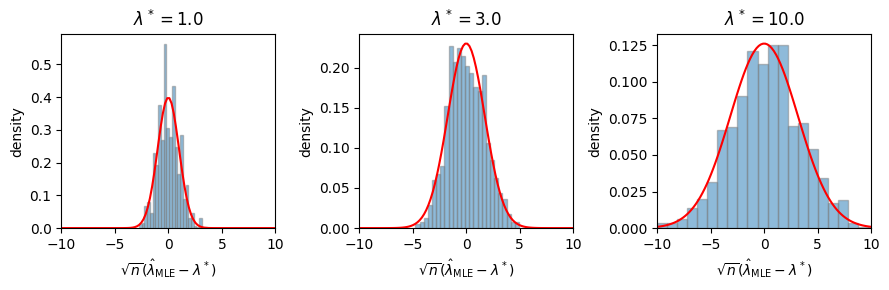

In [40]:
# Simulate a Poisson and look at the distribution of the MLE
def sample_and_compute_mle(seed, n, lmbda_true):
    torch.manual_seed(seed)
    ys = Poisson(lmbda_true).sample((n,))
    lmbda_mle = ys.mean()
    return lmbda_mle

# Compute the MLE for a range of true rates
lmbda_trues = torch.tensor([1.0, 3.0, 10.0])
fig, axs = plt.subplots(1, len(lmbda_trues), figsize=(3 * len(lmbda_trues), 3))
n = torch.as_tensor(30)
for ax, lmbda_true in zip(axs, lmbda_trues):
    fisher_info = 1 / Poisson(lmbda_true).variance

    mles = torch.tensor([sample_and_compute_mle(seed, n, lmbda_true) for seed in range(1000)])

    # Plot a histogram of the MLEs alongside the asymptotic normal distribution
    lmbdas = torch.linspace(-10, 10, 100)
    ax.hist(torch.sqrt(n) * (mles - lmbda_true), density=True, bins=25, alpha=0.5, edgecolor='gray')
    ax.plot(lmbdas, Normal(0, torch.sqrt(1 / fisher_info)).log_prob(lmbdas).exp(), color='red')
    ax.set_xlim(-10, 10)
    ax.set_xlabel(r"$\sqrt{n} (\hat{\lambda}_{\mathsf{MLE}} - \lambda^*)$")
    ax.set_ylabel(r"density")
    ax.set_title(rf"$\lambda^* = {lmbda_true}$")

plt.tight_layout()

## Conjugate duality

The log normalizer is a convex function. Its conjugate dual is,
\begin{align*}
A^*(\mu) &= \sup_{\eta \in \Omega} \left\{ \langle \mu, \eta \rangle - A(\eta) \right\}
\end{align*}
We recognize this as the maximum likelihood problem mapping expected sufficient statistics $\mu$ to natural parameters $\eta$. For minimal exponential families, the supremum is uniquely obtained at $\eta(\mu) = [\nabla A]^{-1}(\mu)$. The conjugate dual evaluates to the log likelihood obtained at $\eta(\mu)$. 

It turns out the conjugate dual is also related to the entropy; in particular, for any $\mu$ in the interior of $\cM$, 
\begin{align*}
A^*(\mu) = - \bbH[p_{\eta(\mu)}],
\end{align*}
where $\eta(\mu) = [\nabla A]^{-1}(\mu)$ for minimal exponential families. To see this, note that
\begin{align*}
-\bbH[p_{\eta(\mu)}] 
&= \bbE_{p(\eta(\mu))}[\log p(X; \eta(\mu))] \\
&= \bbE_{p(\eta(\mu))}[\langle t(X), \eta(\mu) \rangle - A(\eta(\mu))] \\
&= \langle \mu, \eta(\mu) \rangle - A(\eta(\mu)) \\
&= A^*(\mu).
\end{align*}

Moreover, for minimal exponential families, the gradient of $A^*$ provides the inverse map from mean parameters to natural parameters,
\begin{align*}
\nabla A^*(\mu) &= \arg \max_{\eta \in \Omega} \left\{ \langle \mu, \eta \rangle - A(\eta) \right\} 
= [\nabla A]^{-1}(\mu).
\end{align*}

Finally, the log normalizer has a variataional representation in terms of its conjugate dual,
\begin{align*}
A(\eta) &= \sup_{\mu \in \cM} \left\{ \langle \mu, \eta \rangle - A^*(\mu) \right\}.
\end{align*}

For more on conjugate duality, see {cite:t}`wainwright2008graphical`, ch. 3.6.


## KL Divergence

The **Kullback-Leibler (KL) divergence**, or **relative entropy**, between two distributions is,
\begin{align*}
\KL{p}{q} &= \E_{p}\left[\log \frac{p(Y)}{q(Y)} \right].
\end{align*} 
It is non-negative and equal to zero if and only if $p = q$. The KL divergence is _not_ a distance because it is not a symmetric function of $p$ and $q$. (generally, $\KL{p}{q} \neq \KL{q}{p}$.)

When $p$ and $q$ belong to the same exponential family with natural parameters $\eta_p$ and $\eta_q$, respectively, the KL simplifies to,
\begin{align*}
\KL{p}{q} 
&= \E_{p}\left[ \langle t(Y), \eta_p \rangle - A(\eta_p) - \langle t(Y), \eta_q \rangle + A(\eta_q) \right] \\
&= \langle \E_{p} [t(Y)], \eta_p - \eta_q \rangle - A(\eta_p) + A(\eta_q) \\
&= \langle \nabla A(\eta_p), \eta_p - \eta_q \rangle - A(\eta_p) + A(\eta_q).
\end{align*}
This form highlights that the KL divergence between exponential family distributions is a special case of a [Bregman divergence](https://en.wikipedia.org/wiki/Bregman_divergence) based on the convex function $A$.


:::: {admonition} Example: Poisson Distribution

Consider the Poisson distribution with known mean $\lambda$. In the example above, we cast it as an exponential family distribution with 
- sufficient statistics $t(y) = y$
- natural parameter $\eta = \log \lambda$
- log normalizer $A(\eta) = e^\eta$

Derive the KL divergence between two Poisson distributions with means $\lambda_p$ and $\lambda_q$, respectively.

:::{admonition} Answer
:class: tip, dropdown
The KL divergence is,
\begin{align*}
\KL{p}{q} 
&= \langle e^{\eta_p}, \eta_p - \eta_q \rangle - e^{\eta_p} + e^{\eta_q} \\
&= \lambda_p \log \frac{\lambda_p}{\lambda_q} - \lambda_p + \lambda_q \\
\end{align*}
:::

::::


::::{admonition} Example: Gaussian Distribution

Consider the scalar Gaussian distribution with known variance $\sigma^2$. In the example above, we cast it as an exponential family distribution with 
- sufficient statistics $t(y) = \frac{y}{\sigma}$
- natural parameter $\eta = \frac{\mu}{\sigma}$
- log normalizer $A(\eta) = \frac{\eta^2}{2}$

Derive the KL divergence between two Gaussians with equal variance. Denote their natural parameters by $\eta_p = \frac{\mu_p}{\sigma}$ and $\eta_q = \frac{\mu_q}{\sigma}$, respectively.

:::{admonition} Answer
:class: tip, dropdown
The KL divergence is,
\begin{align*}
\KL{p}{q} 
&= \langle \eta_p, \eta_p - \eta_q \rangle - \frac{\eta_p^2}{2} + \frac{\eta_q^2}{2} \\
&=  \frac{\eta_p^2}{2} - \eta_p\eta_q + \frac{\eta_q^2}{2} \\
&=  \frac{1}{2} (\eta_p - \eta_q)^2 \\
&=  \frac{1}{2 \sigma^2} (\mu_p - \mu_q)^2.
\end{align*}
Note that here, the KL _is_ a symmetric function.
:::

::::

<!-- ::::{admonition} KL Divergence in terms of Mean Parameters

**Exercise:** Write the KL divergence in terms of mean parameters and the conjugate dual of the log normalizer.

:::{admonition} Answer
:class: tip, dropdown
\begin{align*}
\KL{p}{q} 
&= \langle \nabla A(\eta_p), \eta_p - \eta_q \rangle - A(\eta_p) + A(\eta_q) \\
&= \langle \mu_p, \eta_p - \eta_q \rangle - \langle \mu_p, \eta_p \rangle + A^*(\mu_p) + \langle \mu_q, \eta_q \rangle - A^*(\mu_q) \\
&= \langle \eta_q, \mu_q - \mu_p \rangle - A^*(\mu_q) + A^*(\mu_p) \\
&= \langle \nabla A^*(\mu_q), \mu_q - \mu_p \rangle - A^*(\mu_q) + A^*(\mu_p)
\\
\end{align*}
:::

:::: -->




## Deviance
Rearranging terms, we can view the KL divergence as a remainder in a Taylor approximation of the log normalizer,
\begin{align*}
A(\eta_q) 
&= A(\eta_p) + (\eta_q - \eta_p)^\top \nabla A(\eta_p) + \KL{p}{q}.
\end{align*}
From this perspective, we see that the KL divergence is related to the Fisher information,
\begin{align*}
\KL{p}{q} 
&\approx \frac{1}{2} (\eta_q - \eta_p)^\top \nabla^2 A(\eta_p) (\eta_q - \eta_p) \\
&= \frac{1}{2} (\eta_q - \eta_p)^\top \cI(\eta_p) (\eta_q - \eta_p),
\end{align*}
up to terms of order $\cO(\|\eta_p - \eta_q\|^3)$.

Thus, while the KL divergence is not a distance metric due to its asymmetry, it is approximately a squared distance under the Fisher information metric,
\begin{align*}
2 \KL{p}{q} \approx \|\eta_q - \eta_p\|_{\cI(\eta_p)}^2.
\end{align*}
We call this quantity the **deviance**. It is simply twice the KL divergence.


(expfam:deviance_residuals)=
## Deviance Residuals

In a normal model, the standarized residual is $\frac{\hat{\mu} - \mu}{\sigma}$. We can view this as a function of the deviance between two normals,
\begin{align*}
\frac{\hat{\mu} - \mu}{\sigma} 
&= \mathrm{sign}(\hat{\mu} - \mu) \sqrt{2 \KL{\hat{\mu}}{\mu}}
\end{align*}
where we have used the shorthand notation 
\begin{align*}
\KL{\mu}{\hat{\mu}} \triangleq \KL{\mathrm{N}(\mu, \sigma^2)}{\mathrm{N}(\hat{\mu}, \sigma^2)}.
\end{align*}

The same form generalizes to other exponential families as well, with the **deviance residual** between the true and estimated mean parameters defined as,
\begin{align*}
r_{\mathsf{D}}(\hat{\mu}, \mu) &= \mathrm{sign}(\hat{\mu} - \mu) \sqrt{2 \KL{\hat{\mu}}{\mu}}.
\end{align*}
One can show that deviance residuals tend to be closer to normal than the more obvious Pearson residuals, 
\begin{align*}
r_{\mathsf{P}}(\hat{\mu}, \mu) &= \frac{\hat{\mu} - \mu}{\sqrt{\Var[t(Y); \hat{\mu}]}}.
\end{align*}
For more on deviance residuals, see {cite:t}`efron2022exponential`, ch. 1.



### Revisiting the Poisson example

Finally, let's revisit the Poisson example one again. We already computed the KL divergence between two Poisson distributions above,
\begin{align*}
\KL{\mathrm{Po}(\hat{\lambda})}{\mathrm{Po}(\lambda)}
&= \hat{\lambda} \log \frac{\hat{\lambda}}{\lambda} - \hat{\lambda} + \lambda,
\end{align*}
so the deviance residual is,
\begin{align*}
r_{\mathrm{D}}(\hat{\lambda}, \lambda) &= \mathrm{sign}(\hat{\lambda} - \lambda) \sqrt{2 \left(\hat{\lambda} \log \frac{\hat{\lambda}}{\lambda} - \hat{\lambda} + \lambda\right)}.
\end{align*}
Compare this to the Pearon residual,
\begin{align*}
r_{\mathrm{P}}(\hat{\lambda}, \lambda) &= \frac{\hat{\lambda} - \lambda}{\sqrt{\hat{\lambda}}}
\end{align*}
Let's compare these residuals in simulation.

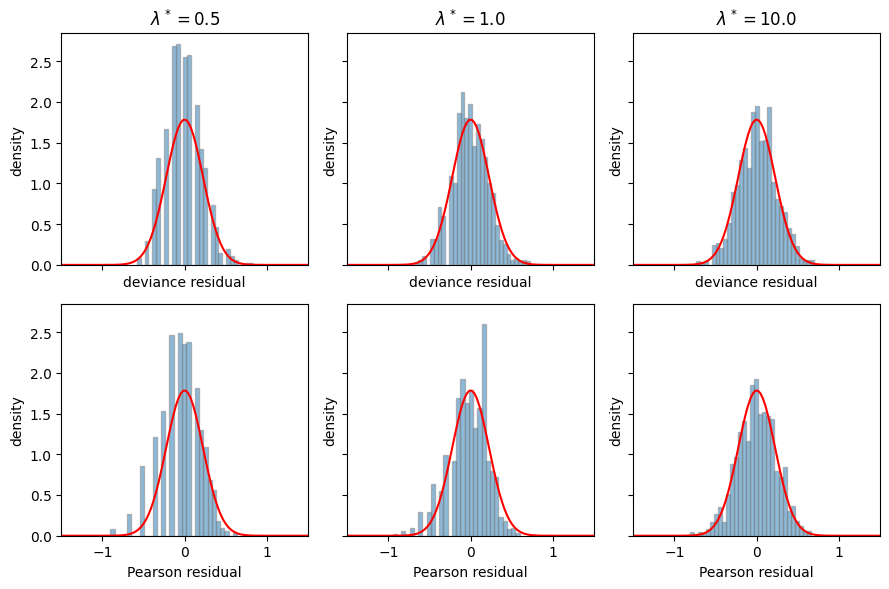

In [61]:
# Simulate a Poisson and compute deviance and Pearson residuals
def sample_and_compute_residuals(seed, n, lmbda_true):
    torch.manual_seed(seed)
    ys = Poisson(lmbda_true).sample((n,))
    lmbda_mle = ys.mean()
    deviance_residuals = torch.sign(lmbda_mle - lmbda_true) \
        * torch.sqrt(2 * kl_divergence(Poisson(lmbda_mle), Poisson(lmbda_true)))
    pearson_residuals = (lmbda_mle - lmbda_true) / torch.sqrt(lmbda_mle)
    return deviance_residuals, pearson_residuals

# Compute the MLE for a range of true rates
lmbda_trues = torch.tensor([0.5, 1.0, 10.0])
fig, axs = plt.subplots(2, len(lmbda_trues), figsize=(3 * len(lmbda_trues), 6), sharex=True, sharey=True)
n = torch.as_tensor(20)
lim = 1.5
rs = torch.linspace(-lim, lim, 100)
for k, lmbda_true in enumerate(lmbda_trues):    
    residuals = [sample_and_compute_residuals(seed, n, lmbda_true) for seed in range(1000)]
    deviance_residuals, pearson_residuals = zip(*residuals)

    # Plot a histogram of the MLEs alongside the asymptotic normal distribution
    axs[0,k].hist(deviance_residuals, density=True, bins=30, alpha=0.5, edgecolor='gray', label="deviance")
    axs[0,k].plot(rs, Normal(0, 1 / torch.sqrt(n)).log_prob(rs).exp(), color='red')
    axs[0,k].set_xlim(-lim, lim)
    axs[0,k].set_xlabel(r"deviance residual")
    axs[0,k].set_ylabel(r"density")
    axs[0,k].set_title(rf"$\lambda^* = {lmbda_true}$")

    axs[1,k].hist(pearson_residuals, density=True, bins=30, alpha=0.5, edgecolor='gray', label="pearson")
    axs[1,k].plot(rs, Normal(0, 1 / torch.sqrt(n)).log_prob(rs).exp(), color='red')
    axs[1,k].set_xlim(-lim, lim)
    axs[1,k].set_xlabel(r"Pearson residual")
    axs[1,k].set_ylabel(r"density")

plt.tight_layout()

Note that I considered $\lambda^* \in [0.5, 1, 10]$ instead of $[1,3,10]$ to see if differences were exaggerated at smaller rates. My intuitions was that we might not expect big differences when the rates are reasonably large, since in that regime the Poisson starts to look fairly Gaussian. Here, however, it's hard for me to say which residual is better &mdash; by eye, they look pretty similar. If you check out Brad's book, you can see that there are indeed differences that suggest deviance residuals are better behaved, it's just not so evident in this example.

## Conclusion

Exponential family distributions have many beautiful properties, and we've only scratched the surface in this chapter. 
- We'll see other nice properties when we talk about building probabilistic models for joint distributions of random variables using exponential family distributions, and conjugate relationships between exponential families will simplify many aspects of Bayesian inference. 
- We'll also see that inference in exponential families is closely connected to convex optimization &mdash; we saw that today for the MLE! &mdash; but for more complex models, the optimization problems can still be computationally intractable, even though its convex. That will motivate our discussion of variational inference later in the course.

Armed with exponential family distributions, we can start to build more expressive models for categorical data. First up, generalized linear models!
